### Imports

In [2]:
import numpy as np

import sympy as sym

import itertools

import pandas as pd

import glob

In [3]:
from operator import itemgetter

In [4]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 13

In [6]:
import tqdm

## Evolutionary simulations

In [7]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [8]:
names1 = [f"p_{i}" for i in range(1, 3)] + ["t", "cooperation"]
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
names3 = [f"p_{i}" for i in range(1, 9)] + ["t", "cooperation"]

In [9]:
def frequencies(df, max_steps=10 ** 7):

    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [10]:
def one_bit_condition_one(p1, p2, c, b):
    
    return p2 < 1 - c / b 

def one_bit_condition_two(p1, p2, c, b):
    
    return p1 > 0.95

def is_partner_one_bit(p1, p2, c, b):
    return (one_bit_condition_one(p1, p2, c, 1)) and (one_bit_condition_two(p1, p2, c, 1))

In [11]:
def two_bit_condition_one(p1, p2, p3, p4, c, b):
    
    return p4 < (1 - c / b)

def two_bit_condition_two(p1, p2, p3, p4, c, b):
    
    return p2 + p3 < (2 - c / b)

def two_bit_condition_three(p1, p2, p3, p4, c, b):
    
    return p1 > 0.95

def is_partner_two_bits(p1, p2, p3, p4, c, b):
    
    return ((two_bit_condition_one(p1, p2, p3, p4, c, 1)) and 
            two_bit_condition_two(p1, p2, p3, p4, c, 1) and 
            two_bit_condition_three(p1, p2, p3, p4, c, 1))

In [12]:
def three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p8 < (1 - c / b)

def three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p3 + p6 < (2 - c / b)

def three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p2 + p3 + p5 < (3 - c / b)

def three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p4 + p6 + p7 < (3 - 2 * c / b)

def three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p2 + p4 + p5 + p7 < (4 - 2 * c / b)


def three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return p1 > 0.95


def is_partner_three_bits(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    
    return ((three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)) and
            (three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)) and
            (three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)) and
            (three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)) and
            (three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)) and
            (three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, 1)))

### One bit

In [12]:
files = glob.glob(f"../data/matlab_data/bits_2_beta_*_seed_1_*.csv")

In [139]:
one_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names1)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 10 ** 7)
    
    one_bits.append(df)

In [140]:
one_bits = pd.concat(one_bits)

In [141]:
ispartner = []

for i, row in tqdm.tqdm(one_bits.iterrows()):
    condition = is_partner_one_bit(row['p_1'], row['p_2'], row['c'], 1)
    
    ispartner.append(condition)

1389230it [00:46, 29715.31it/s]


In [142]:
one_bits['isPartner'] = ispartner

In [143]:
one_bits.to_csv("../evolution_over_c_and_beta_one_bit.csv")

### Two bits

In [28]:
files = glob.glob(f"../data/matlab_data/bits_4_beta_0.1_seed_1_*.csv")

files += glob.glob(f"../data/matlab_data/bits_4_beta_1_seed_1_*.csv")

two_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names2)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 10 ** 7)
    
    two_bits.append(df)

In [29]:
files = glob.glob("../data/long/bits_4_beta_10_seed_1_c_*.csv")

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names2)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 10 ** 8)
    
    two_bits.append(df)

In [30]:
two_bits = pd.concat(two_bits)

In [31]:
ispartner = []

for i, row in tqdm.tqdm(two_bits.iterrows()):
    condition = is_partner_two_bits(row['p_1'], row['p_2'], row['p_3'], row['p_4'], row['c'], 1)
    
    ispartner.append(condition)

1729309it [01:06, 26161.23it/s]


In [32]:
two_bits['isPartner'] = ispartner

In [213]:
two_bits.to_csv("../evolution_over_c_and_beta_two_bits.csv")

#### Counting Two bit

In [13]:
files = glob.glob(f"../data/counting/bits_4_beta_0.1_seed_1_c_*.csv")
files += glob.glob(f"../data/counting/bits_4_beta_1_seed_1_c_*.csv")
files += glob.glob(f"../data/counting/bits_4_beta_10_seed_1_c_*.csv")

In [14]:
counting_two_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names2)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 10 ** 7)
    
    counting_two_bits.append(df)

In [15]:
counting_two_bits = pd.concat(counting_two_bits)

In [16]:
ispartner = []

for i, row in tqdm.tqdm(counting_two_bits.iterrows()):
    condition = is_partner_two_bits(row['p_1'], row['p_2'], row['p_3'], row['p_4'], row['c'], 1)
    
    ispartner.append(condition)

1568867it [02:02, 12836.80it/s]


In [17]:
counting_two_bits['isPartner'] = ispartner

In [18]:
counting_two_bits.to_csv("../evolution_over_c_and_beta_two_bits_counting.csv")

In [19]:
counting_two_bits['beta'].unique()

array([ 0.1,  1. , 10. ])

### Three bits

In [175]:
files = glob.glob(f"../data/matlab_data/bits_8_beta_*_seed_1_*.csv")

In [195]:
three_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names3)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 2 * 10 ** 7)
    
    three_bits.append(df)

In [196]:
three_bits = pd.concat(three_bits)

In [197]:
ispartner = []

for i, row in tqdm.tqdm(three_bits.iterrows()):
    condition = is_partner_three_bits(row['p_1'], row['p_2'], row['p_3'], row['p_4'],
                                      row['p_5'], row['p_6'], row['p_7'], row['p_8'],
                                      row['c'], 1)
    
    ispartner.append(condition)

2384831it [02:07, 18770.29it/s]


In [198]:
three_bits['isPartner'] = ispartner

In [199]:
three_bits.to_csv("../evolution_over_c_and_beta_three_bits.csv")

#### Counting Three Bits

In [23]:
files = glob.glob(f"../data/counting/bits_8_beta_0.1_seed_1_c_*.csv")
files += glob.glob(f"../data/counting/bits_8_beta_1_seed_1_c_*.csv")
files += glob.glob(f"../data/counting/bits_8_beta_10_seed_1_c_*.csv")

In [26]:
counting_three_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    beta = float(file.split("beta_")[1].split("_")[0])
    
    df = pd.read_csv(file, names=names3)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df['beta'] = beta
    
    df = frequencies(df, 2 * 10 ** 7)
    
    counting_three_bits.append(df)

In [27]:
counting_three_bits = pd.concat(counting_three_bits)

In [28]:
ispartner = []

for i, row in tqdm.tqdm(counting_three_bits.iterrows()):
    condition = is_partner_three_bits(row['p_1'], row['p_2'], row['p_3'], row['p_4'],
                                      row['p_5'], row['p_6'], row['p_7'], row['p_8'],
                                      row['c'], 1)
    
    ispartner.append(condition)

3038072it [06:48, 7430.77it/s] 


In [29]:
counting_three_bits['isPartner'] = ispartner

In [30]:
counting_three_bits.to_csv("../evolution_over_c_and_beta_three_bits_counting.csv")

In [31]:
counting_three_bits['beta'].unique()

array([ 0.1,  1. , 10. ])

## $\beta=0.1$

In [70]:
beta = 0.1

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_0.1_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df['seed'] = 1
        
        partners = []
        for i, row in df.iterrows():
            if sdim == 2:
                ps = [f'p_{i}' for i in range(1, 3)]
            if sdim == 4:
                ps = [f'p_{i}' for i in range(1, 5)]
            if sdim == 8:
                ps = [f'p_{i}' for i in range(1, 9)]
                
            pcondition = isPartner(sdim, row[ps], c)
            
            partners.append(pcondition)
            
        df['isPartner'] = partners
                
        df = frequencies(df, max_step)

        dfs.append(df)


In [69]:
df

,p_1,p_2,t,cooperation,beta,c,type,seed
0,0.000000,0.000000,0,0.000000,0.1,1,one-bit,1
1,0.292531,0.010934,360,0.015219,0.1,1,one-bit,1
2,0.274750,0.039712,2531,0.051914,0.1,1,one-bit,1
3,0.113373,0.160701,2568,0.153439,0.1,1,one-bit,1
4,0.855035,0.079606,2983,0.354479,0.1,1,one-bit,1
...,...,...,...,...,...,...,...,...
50982,0.331345,0.528536,9999516,0.441480,0.1,1,one-bit,1
50983,0.407114,0.165997,9999622,0.218739,0.1,1,one-bit,1
50984,0.623365,0.410171,9999725,0.521311,0.1,1,one-bit,1
50985,0.572719,0.152886,9999734,0.263521,0.1,1,one-bit,1


In [13]:
df = pd.concat(dfs)

In [14]:
df.to_csv("../evolution_for_beta_0_1.csv")

## $\beta=1$

In [15]:
beta = 1

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_{beta}_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df['seed'] = 1
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [16]:
df = pd.concat(dfs)

In [17]:
df.to_csv("../evolution_for_beta_1.csv")

## $\beta = 10$

In [18]:
beta = 10

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_{beta}_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df['seed'] = 1
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [19]:
for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/beta_10/bits_{sdim}_beta_{beta}_seed_2_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df['seed'] = 2
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [20]:
df = pd.concat(dfs)

In [21]:
df.to_csv("../evolution_for_beta_10.csv")

### $\beta = 2$

In [125]:
beta = 2

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/beta_2/bits_{sdim}_beta_{beta}_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df['seed'] = 1
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [126]:
df = pd.concat(dfs)

In [130]:
groups = df.groupby("type")

per_type_points = []
for i, group in groups:
    print(i)
    points = []
    group = group.sort_values("c")
    cost_groups = group.groupby("c")
    
    for j, cost_group in cost_groups:
        points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
        
    per_type_points.append(points)

one-bit
three-bit
two-bit


In [134]:
per_type_points[2]

[0.9778405703816694,
 0.9547406431683146,
 0.8926418895296571,
 0.7769259380858125,
 0.598420950143528,
 0.42452021020619635,
 0.27581065644653435,
 0.16843213421453765,
 0.08056122220565692,
 0.04568113240620081,
 0.02492153846028292]

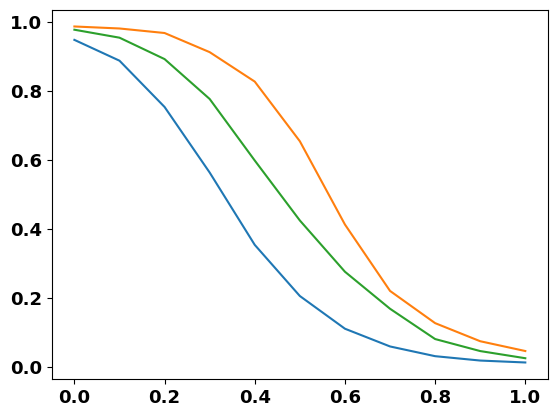

In [137]:
for points in per_type_points:
    plt.plot(np.linspace(0, 1, 11), points)

## Over seeds

In [75]:
import os

In [81]:
dfs = []

for sdim, type_, max_step, name in zip([2, 4, 8],
                             ['one', 'two', 'three'],
                             [10 ** 7, 10 ** 7, 2 * 10 ** 7],
                             [names1, names2, names3]):

    for seed in range(1, 11):
    
        file = f"../data/evolution_over_seeds/bits_{sdim}_beta_1_seed_{seed}_c_0.5.csv"

        df = pd.read_csv(file, names=name)

        df = df.drop_duplicates()

        df['type'] = type_
        df['seed'] = seed
        
        df = frequencies(df, max_step)

        dfs.append(df)
        
        os.remove(file)

In [77]:
df = pd.concat(dfs)

In [78]:
df.to_csv("./evolution_over_seeds.csv")

### Discounting

In [109]:
df = pd.read_csv("../data/counting/bits_2_beta_2_seed_1_c_0.1.csv")

In [110]:
df.head()

,0,0.1,0.2,0.3
0,0.954037,0.263469,113,0.851460
1,0.977346,0.843701,397,0.973851
2,0.436207,0.995380,443,0.638403
3,0.431486,0.309866,449,0.352770
4,0.852462,0.469124,461,0.760748


In [116]:
files = glob.glob("../data/counting/bits_4_beta_0.1_seed_1_c_*.csv")
files += glob.glob("../data/counting/bits_4_beta_1_seed_1_c_*.csv")
files += glob.glob("../data/counting/bits_4_beta_2_seed_1_c_*.csv")
files += glob.glob("../data/counting/bits_4_beta_10_seed_1_c_*.csv")

In [117]:
len(files) 

44

In [118]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [119]:
names = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]

In [120]:
dfs = []

for file in files:
    beta = float(file.split("beta_")[1].split("_")[0])
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    df = pd.read_csv(file, names=names)
        
    df = df.drop_duplicates()

    df['beta'] = beta
    
    df['c'] = c
    
    df = frequencies(df, 10 ** 7)

    dfs.append(df)
    
#     os.remove(file)

In [121]:
df = pd.concat(dfs)

In [122]:
df.to_csv("../two_bits_counting_over_cs.csv")